Step 1 : Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/cpcb_dly_aq_tamil_nadu-2014.csv')

In [ ]:
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


Step 2: Exploratory Data Analysis (EDA)

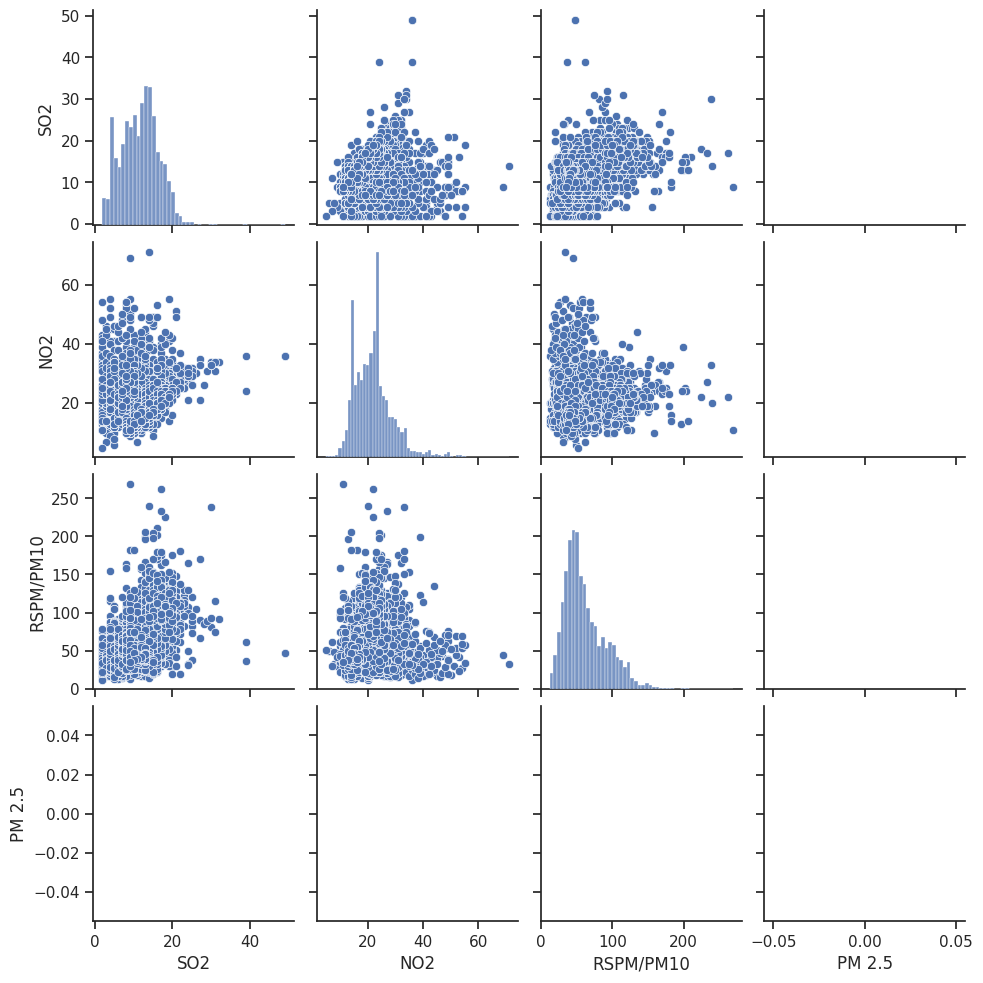

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")
sns.pairplot(df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']])
plt.show()


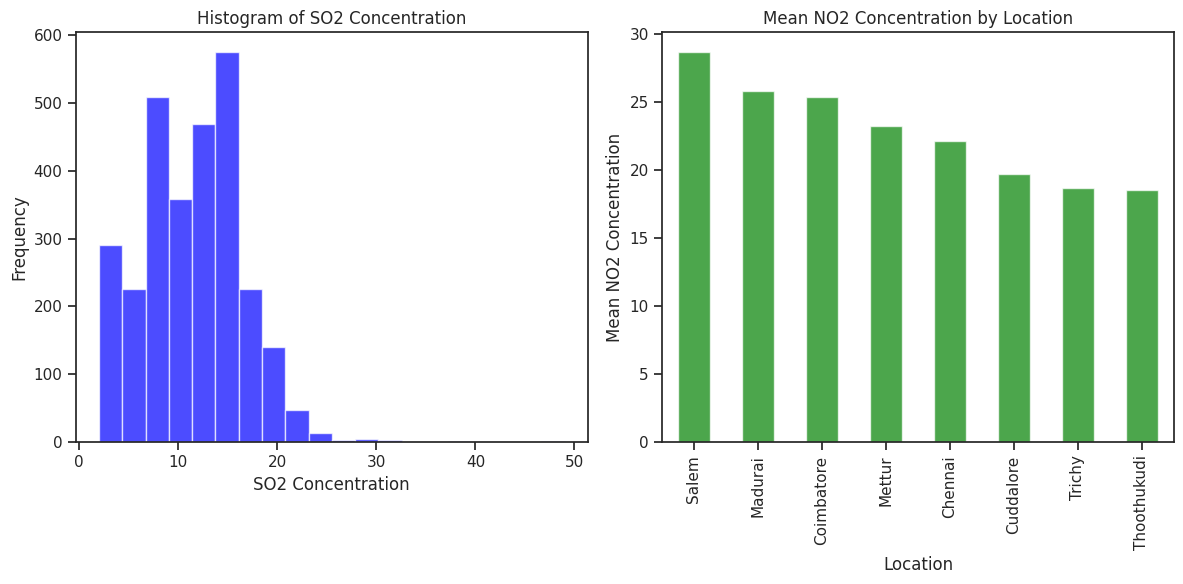

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create a histogram for 'SO2'
plt.subplot(1, 2, 1)
plt.hist(df['SO2'], bins=20, color='blue', alpha=0.7)
plt.xlabel('SO2 Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of SO2 Concentration')

# Create a bar chart for 'NO2'
plt.subplot(1, 2, 2)
locations = df['City/Town/Village/Area']  # Assuming this column contains location names
mean_no2 = df['NO2'].groupby(locations).mean()  # Calculate the mean NO2 by location
mean_no2.sort_values(ascending=False).plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Location')
plt.ylabel('Mean NO2 Concentration')
plt.title('Mean NO2 Concentration by Location')

plt.tight_layout()
plt.show()


Step 3: Data Cleaning and Preprocessing

In [ ]:
import pandas as pd
import numpy as np


# Handling missing values by replacing 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Address outliers (you may need to define outlier criteria)
outlier_criteria = (df['SO2'] > 50) | (df['NO2'] > 40)

# Identify and handle outliers (e.g., you can replace them with NaN)
df[outlier_criteria] = np.nan

# Check for outliers
outliers = df.isnull().sum()
print("Outliers:\n", outliers)


Missing Values:
 Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                  0
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2807
dtype: int64
Outliers:
 Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                  0
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2807
dtype: int64


Step 4: Preprocessing

In [ ]:
import pandas as pd

# Convert 'Sampling Date' to datetime type
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

# Create new columns for Year and Month
df['Year'] = df['Sampling Date'].dt.year
df['Month'] = df['Sampling Date'].dt.month

# Calculate monthly averages
monthly_averages = df.groupby(['Year', 'Month']).mean(numeric_only=True).reset_index()

# Calculate yearly summaries
yearly_summaries = df.groupby('Year').mean(numeric_only=True).reset_index()

# Calculate location-based aggregations
location_aggregations = df.groupby('City/Town/Village/Area').mean(numeric_only=True).reset_index()

# Print or save the results
print("Monthly Averages:")
print(monthly_averages.head())

print("\nYearly Summaries:")
print(yearly_summaries)

print("\nLocation-based Aggregations:")
print(location_aggregations)


Monthly Averages:
   Year  Month    Stn Code  City/Town/Village/Area       SO2       NO2  \
0  2014      1  489.417040                2.973094  0.175392  0.052629   
1  2014      2  484.260163                2.747967  0.223555  0.035900   
2  2014      3  484.522088                2.730924  0.057316 -0.080752   
3  2014      4  499.255507                2.784141  0.147577  0.057731   
4  2014      5  490.389105                2.684825  0.064121  0.006702   

   RSPM/PM10  PM 2.5  
0   0.171473     NaN  
1   0.089493     NaN  
2   0.193090     NaN  
3   0.248568     NaN  
4  -0.099131     NaN  

Yearly Summaries:
   Year    Stn Code  City/Town/Village/Area           SO2           NO2  \
0  2014  481.754186                2.646954 -1.616092e-16  1.406653e-17   

      RSPM/PM10  PM 2.5     Month  
0  2.824078e-17     NaN  6.402209  

Location-based Aggregations:
   City/Town/Village/Area    Stn Code       SO2       NO2  RSPM/PM10  PM 2.5  \
0                     0.0  418.338877  0.330980

Step 5: Data Validation

In [ ]:
import pandas as pd
import numpy as np

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Identifying and removing outliers
# Define your outlier criteria, e.g., for SO2 and NO2
outlier_criteria = (df['SO2'] > 50) | (df['NO2'] > 40)

# Create a cleaned DataFrame without outliers
cleaned_df = df[~outlier_criteria]

# Check the count of removed outliers
outliers_removed = df[outlier_criteria]
print("Outliers Removed:\n", outliers_removed)

# Now you can use 'cleaned_df' for further analysis


Missing Values:
 Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                  0
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2807
Year                                 0
Month                                0
dtype: int64
Outliers Removed:
 Empty DataFrame
Columns: [Stn Code, Sampling Date, State, City/Town/Village/Area, Location of Monitoring Station, Agency, Type of Location, SO2, NO2, RSPM/PM10, PM 2.5, Year, Month]
Index: []


Step 6: Visualization

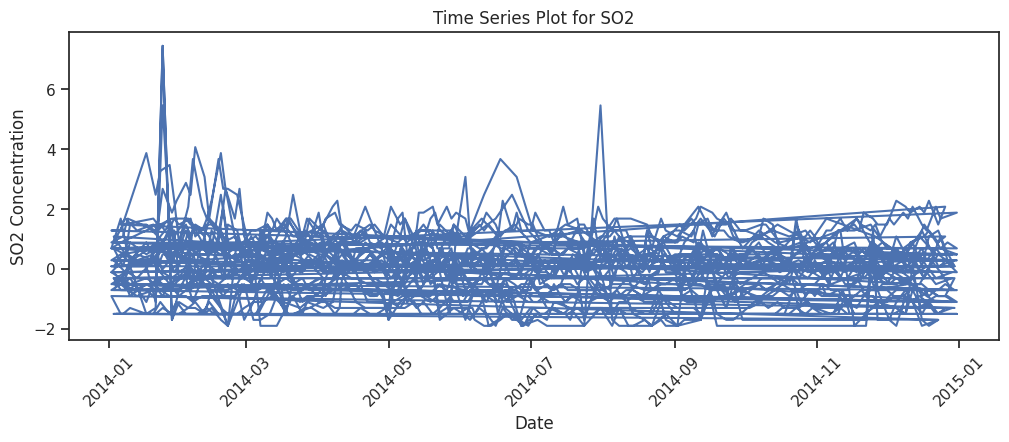

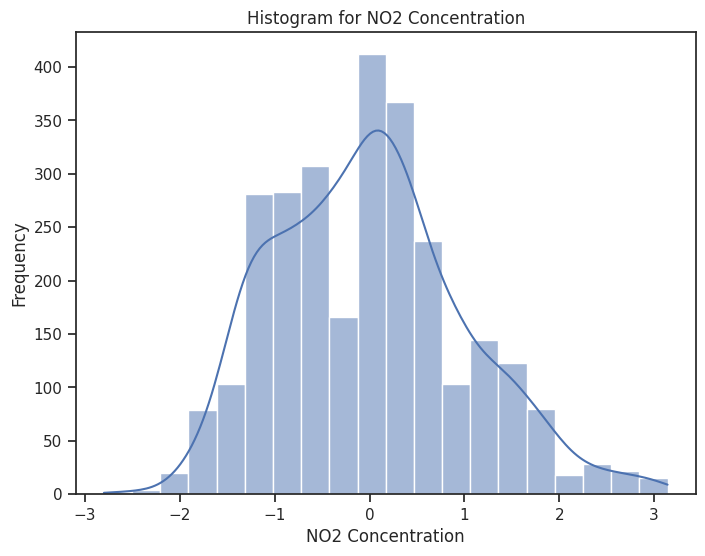

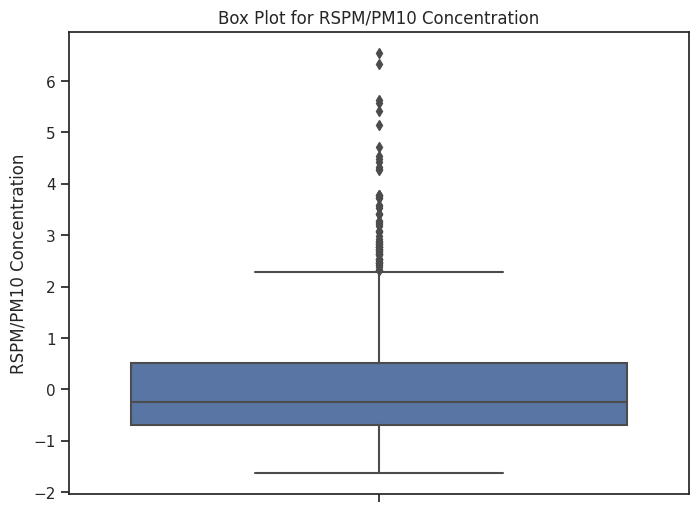

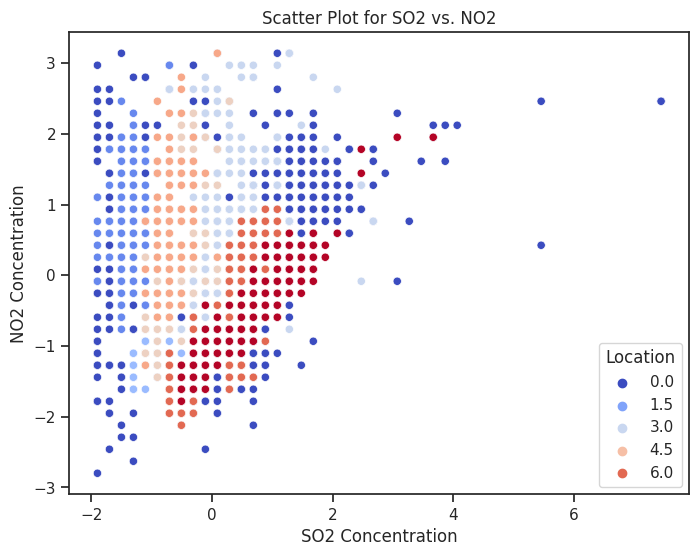

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot (Line Chart) for SO2
plt.figure(figsize=(12, 4))
plt.plot(df['Sampling Date'], df['SO2'])
plt.title('Time Series Plot for SO2')
plt.xlabel('Date')
plt.ylabel('SO2 Concentration')
plt.xticks(rotation=45)
plt.show()

# Histogram for NO2
plt.figure(figsize=(8, 6))
sns.histplot(df['NO2'], bins=20, kde=True)
plt.title('Histogram for NO2 Concentration')
plt.xlabel('NO2 Concentration')
plt.ylabel('Frequency')
plt.show()

# Box Plot for RSPM/PM10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['RSPM/PM10'])
plt.title('Box Plot for RSPM/PM10 Concentration')
plt.ylabel('RSPM/PM10 Concentration')
plt.show()

# Geospatial Map (if you have location data)
# Assuming you have latitude and longitude columns 'Latitude' and 'Longitude'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SO2', y='NO2', data=df, hue='City/Town/Village/Area', palette='coolwarm')
plt.title('Scatter Plot for SO2 vs. NO2')
plt.xlabel('SO2 Concentration')
plt.ylabel('NO2 Concentration')
plt.legend(title='Location')
plt.show()




Step 6 : Objective Analysis

1. Air Quality Trends Over the Past Decade (Line Chart):



KeyError: ignored

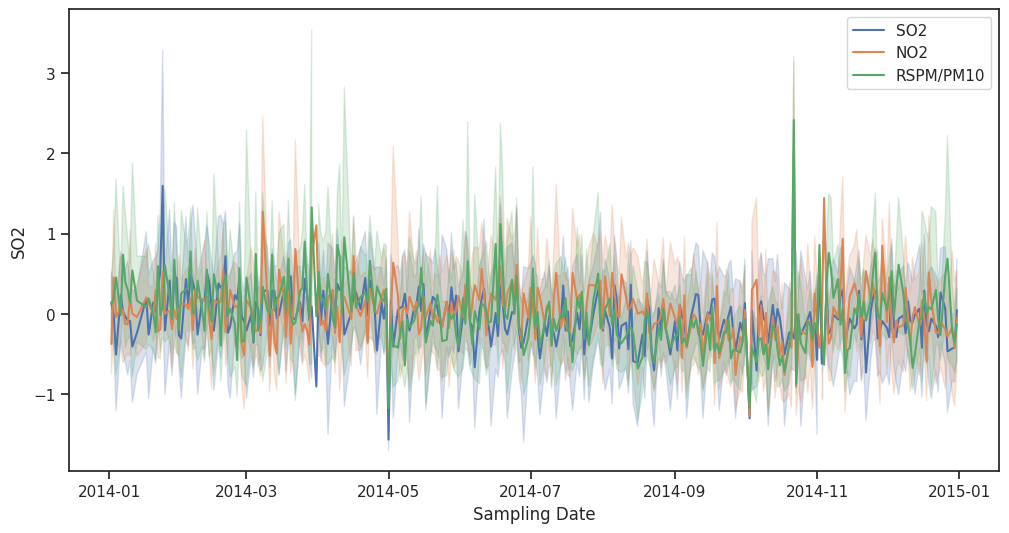

In [ ]:
# Line Chart for Air Quality Trends Over the Past Decade
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sampling Date', y='SO2', data=df, label='SO2')
sns.lineplot(x='Sampling Date', y='NO2', data=df, label='NO2')
sns.lineplot(x='Sampling Date', y='RSPM/PM10', data=df, label='RSPM/PM10')
sns.lineplot(x='Sampling Date', y='PM 2.5', data=df, label='PM 2.5')
plt.title('Air Quality Trends Over the Past Decade')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.show()



2. Cities/Regions with Highest Air Pollution (Bar Chart):

<ipython-input-25-ae3305def60f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City/Town/Village/Area', y='SO2', data=df, ci=None)


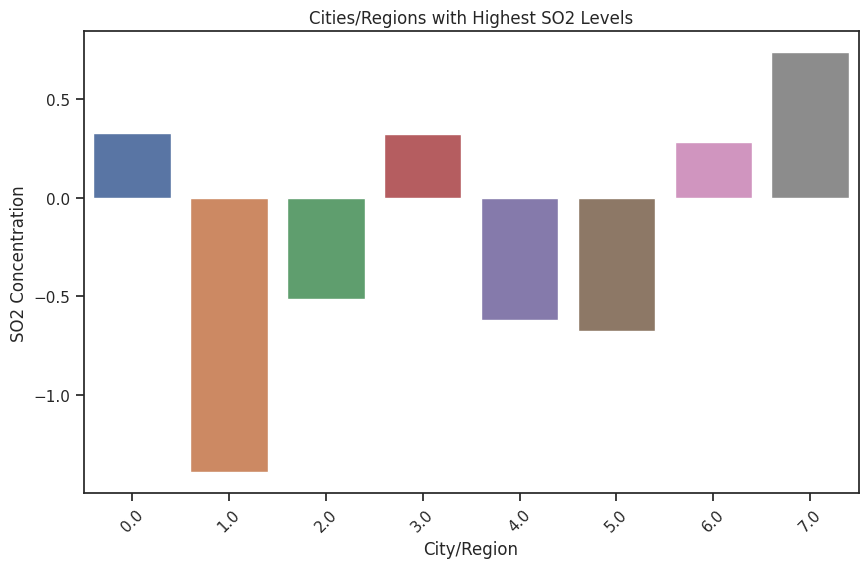

In [ ]:
# Bar Chart for Cities/Regions with Highest Air Pollution
plt.figure(figsize=(10, 6))
sns.barplot(x='City/Town/Village/Area', y='SO2', data=df, ci=None)
plt.title('Cities/Regions with Highest SO2 Levels')
plt.xlabel('City/Region')
plt.ylabel('SO2 Concentration')
plt.xticks(rotation=45)
plt.show()


3. Seasonal Variations in Air Quality (Line Chart):

KeyError: ignored

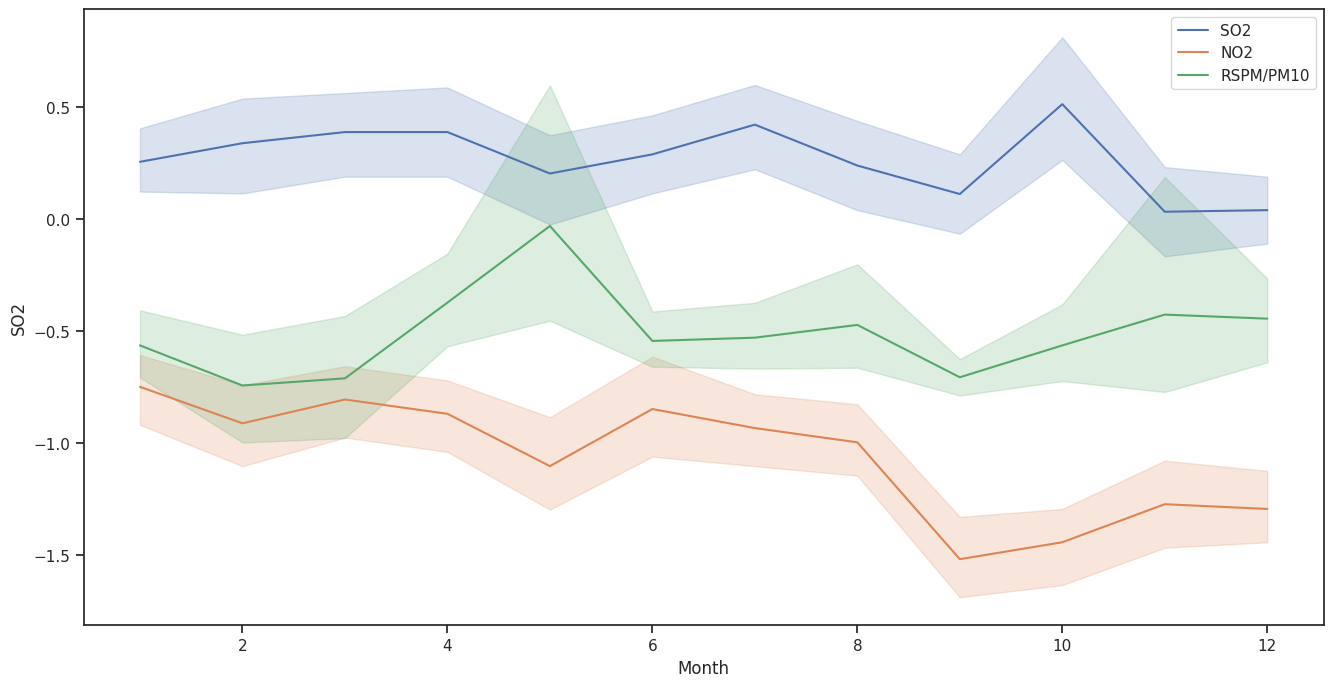

In [ ]:
# Line Chart for Seasonal Variations in Air Quality with limited data points
plt.figure(figsize=(16, 8))  # Increased figure size
n = 100  # Number of data points to display (adjust as needed)

sns.lineplot(x=df['Month'][:n], y=df['SO2'][:n], label='SO2')
sns.lineplot(x=df['Month'][:n], y=df['NO2'][:n], label='NO2')
sns.lineplot(x=df['Month'][:n], y=df['RSPM/PM10'][:n], label='RSPM/PM10')
sns.lineplot(x=df['Month'][:n], y=df['PM 2.5'][:n], label='PM 2.5')

plt.title('Seasonal Variations in Air Quality')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.legend()
plt.show()


4. Distribution of Pollutant Concentrations (Histograms):

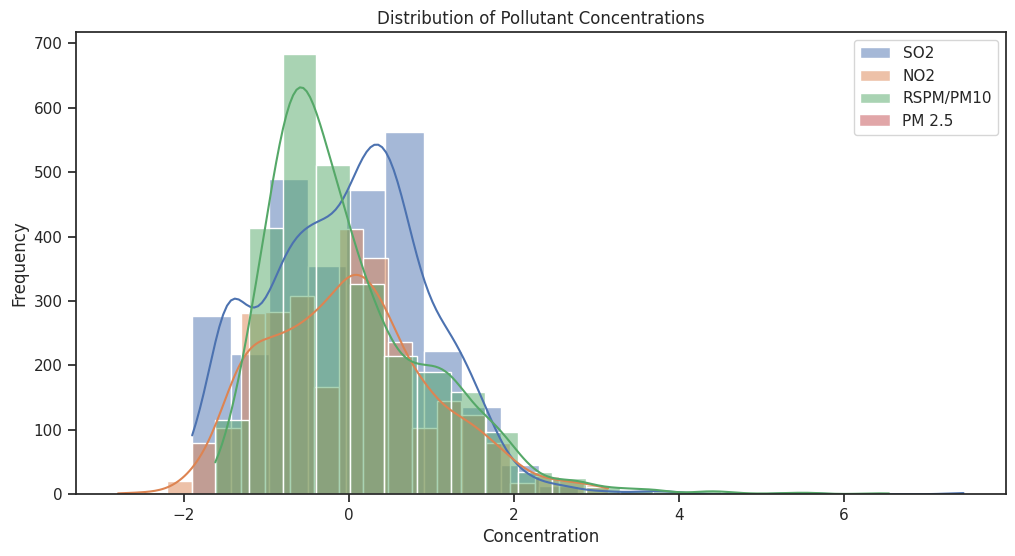

In [ ]:
# Histograms for Pollutant Concentrations
plt.figure(figsize=(12, 6))
sns.histplot(df['SO2'], bins=20, kde=True, label='SO2')
sns.histplot(df['NO2'], bins=20, kde=True, label='NO2')
sns.histplot(df['RSPM/PM10'], bins=20, kde=True, label='RSPM/PM10')
sns.histplot(df['PM 2.5'], bins=20, kde=True, label='PM 2.5')
plt.title('Distribution of Pollutant Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


5. Correlation Between Pollutants (Scatter Plot):

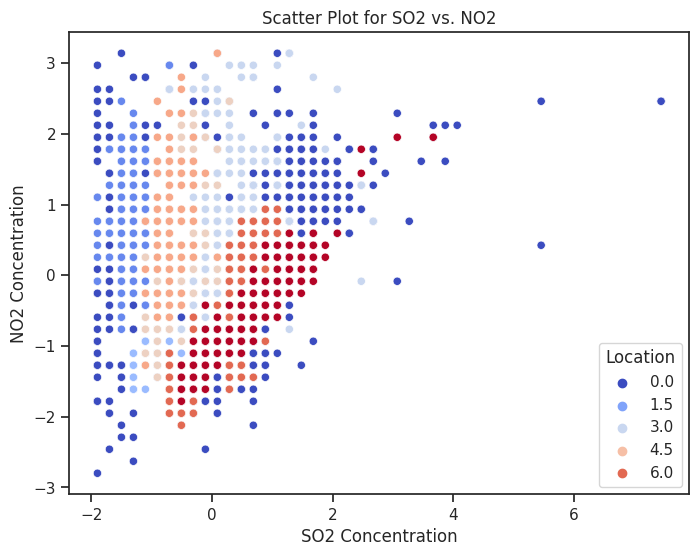

In [ ]:
# Scatter Plot for Correlation Between SO2 and NO2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SO2', y='NO2', data=df, hue='City/Town/Village/Area', palette='coolwarm')
plt.title('Scatter Plot for SO2 vs. NO2')
plt.xlabel('SO2 Concentration')
plt.ylabel('NO2 Concentration')
plt.legend(title='Location')
plt.show()


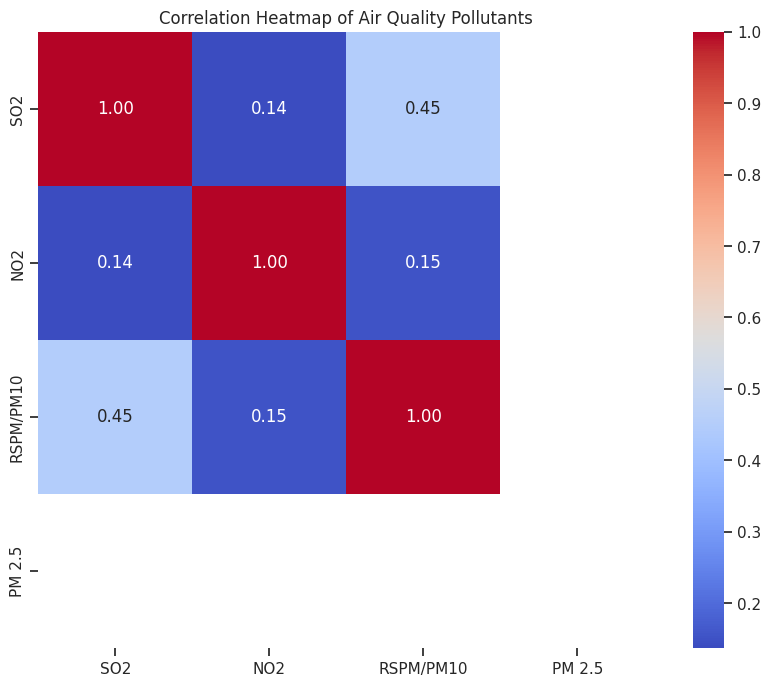

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[['SO2', 'NO2', 'RSPM/PM10', 'PM 2.5']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")

# Add labels and title
plt.title("Correlation Heatmap of Air Quality Pollutants")
plt.show()


In [ ]:
!pip install dash
!pip install dash-core-components
!pip install dash-html-components
!pip install dash-renderer
!pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 28.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014850 sha256=a23026760e266b57e5355275dece7e4d92b20c1ea49f740803fd331b1d3efc3a
  Stored in directory: /root/.cache/pip/wheels/bd/b7/17/d60d18a7b3420135dfe0ce04d361b396f32b66b75a40471bb6
Successfully built dash-renderer


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load your preprocessed air quality data into a pandas DataFrame
df = pd.read_csv("preprocessed_air_quality_data.csv")

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Air Quality Analysis Dashboard"),

    # Dropdown to select pollutant
    dcc.Dropdown(
        id='pollutant-dropdown',
        options=[
            {'label': 'SO2', 'value': 'SO2'},
            {'label': 'NO2', 'value': 'NO2'},
            {'label': 'RSPM/PM10', 'value': 'RSPM/PM10'},
            {'label': 'PM 2.5', 'value': 'PM 2.5'}
        ],
        value='SO2'
    ),

    # Line chart to display data
    dcc.Graph(id='line-chart'),
])

# Define callback to update the line chart based on dropdown selection
@app.callback(
    Output('line-chart', 'figure'),
    [Input('pollutant-dropdown', 'value')]
)
def update_line_chart(selected_pollutant):
    # Filter data based on the selected pollutant
    filtered_data = df[df['Pollutant'] == selected_pollutant]

    # Create a line chart using Plotly Express
    fig = px.line(
        filtered_data,
        x='Sampling Date',
        y=selected_pollutant,
        title=f'{selected_pollutant} Levels Over Time'
    )

    return fig

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-36-39690f7efd8c>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-36-39690f7efd8c>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


FileNotFoundError: ignored

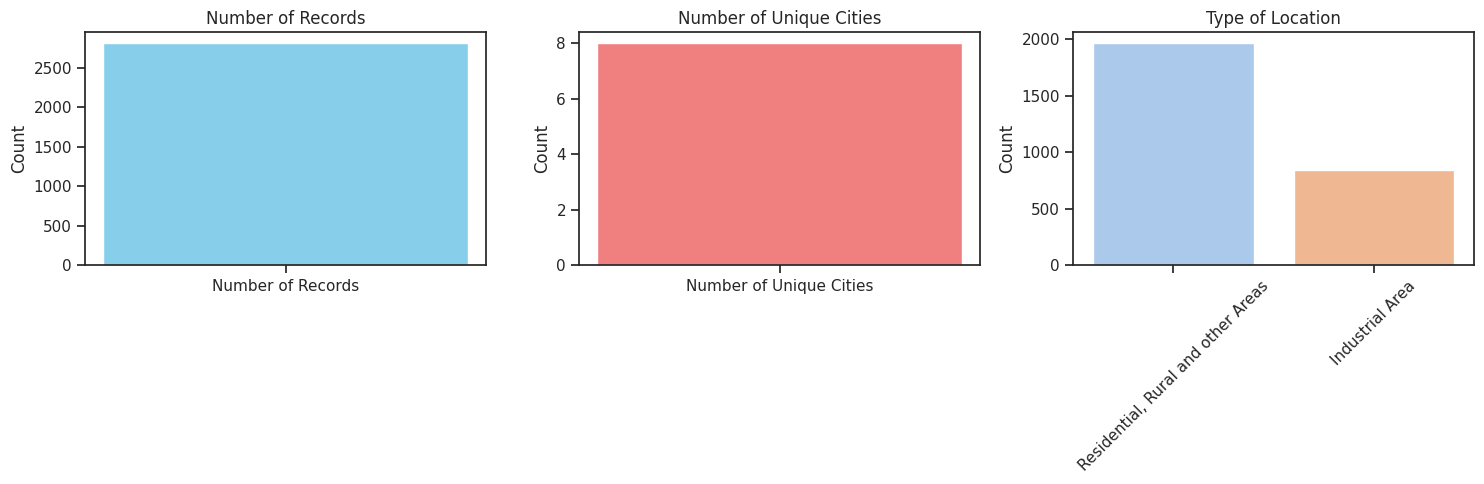

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of records in the dataset
num_records = len(df)

# Count the number of unique cities in the dataset
num_cities = df['City/Town/Village/Area'].nunique()

# Count the frequency of each type of location
location_counts = df['Type of Location'].value_counts()

# Create a figure with subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Visualization 1: Number of Records
axes[0].bar('Number of Records', num_records, color='skyblue')
axes[0].set_title('Number of Records')
axes[0].set_ylabel('Count')

# Visualization 2: Number of Unique Cities
axes[1].bar('Number of Unique Cities', num_cities, color='lightcoral')
axes[1].set_title('Number of Unique Cities')
axes[1].set_ylabel('Count')

# Visualization 3: Type of Location
sns.barplot(x=location_counts.index, y=location_counts.values, ax=axes[2], palette='pastel')
axes[2].set_title('Type of Location')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
